In [53]:
def py_slow_cos(x,n_terms):
    suma=1
    factorial=1
    for i in range(2,2*n_terms,2):
        factorial*=-i*(i-1)
        suma+=((x)**(i))/factorial
    return suma

In [54]:
def py_fast_cos(x,n_terms):
    suma=1
    aux=1
    for i in range(2,2*n_terms,2):
        aux*=-(x*x)/(i*(i-1))
        suma+=aux
    return suma

In [55]:
%%file c_cos.c

double c_double_cos(double x,int n_terms){
    double suma=1,aux=1;
    for(int i=2;i<2*n_terms;aux*=-(x*x)/(i*(i-1)),suma+=aux,i+=2);
    return suma;
}

long double c_ldouble_cos(long double x,int n_terms){
    long double suma=1,aux=1;
    for(int i=2;i<2*n_terms;aux*=-(x*x)/(i*(i-1)),suma+=aux,i+=2);
    return suma;
}

Overwriting c_cos.c


In [56]:
!gcc -c c_cos.c -o c_cos.o

In [57]:
!gcc -fpic -shared c_cos.o -o c_cos.so

In [58]:
import ctypes

def ctypes_cos():
    ola=ctypes.CDLL('./c_cos.so')
    ola.c_double_cos.argtypes=[ctypes.c_double,ctypes.c_int]
    ola.c_double_cos.restype=ctypes.c_double
    ola.c_ldouble_cos.argtypes=[ctypes.c_longdouble,ctypes.c_int]
    ola.c_ldouble_cos.restype=ctypes.c_longdouble
    return ola.c_double_cos,ola.c_ldouble_cos

In [59]:
c_double_cos,c_ldouble_cos=ctypes_cos()

In [60]:
import numpy as np

def encontrar_n_terms(f,inf,sup,n_angs,pre):
    angulos=np.linspace(inf,sup,n_angs)
    terminos=1
    while(True):
        listaCalculos=[]
        listaReferencias=[]
        i=inf
        while i<=sup: 
            listaCalculos.append(f(i,terminos))
            listaReferencias.append(np.cos(i))
            i+=1
        if(abs(np.linalg.norm(listaCalculos)-np.linalg.norm(listaReferencias))/np.linalg.norm(listaReferencias)<pre):
            break
        terminos+=1
    return terminos

In [61]:
import math

inf=-2*math.pi
sup=2*math.pi
n_angs=1000
pre=4e-15

In [62]:
f=py_slow_cos

a1=encontrar_n_terms(f,inf,sup,n_angs,pre)

In [63]:
a1

19

In [64]:
f=py_fast_cos

a2=encontrar_n_terms(f,inf,sup,n_angs,pre)

In [65]:
a2

19

In [66]:
f=c_double_cos

a3=encontrar_n_terms(f,inf,sup,n_angs,pre)

In [67]:
a3

19

In [68]:
f=c_ldouble_cos

a4=encontrar_n_terms(f,inf,sup,n_angs,pre)

In [69]:
a4

19

In [70]:
import time

def encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter):
    tiempos=[]
    for i in range(n_iter):
        tic=time.perf_counter()
        f(ang,n_terms)
        toc=time.perf_counter()
        tiempos.append(1e6*(toc-tic))
    return np.median(tiempos)   

In [71]:
ang=inf
n_iter=50

In [72]:
f=py_slow_cos
n_terms=a1

b1=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [73]:
b1

3.3894993975991383

In [74]:
f=py_fast_cos
n_terms=a2

b2=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [75]:
b2

3.1099989428184927

In [76]:
f=c_double_cos
n_terms=a3

b3=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [77]:
b3

0.4099983925698325

In [78]:
f=c_ldouble_cos
n_terms=a4

b4=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [79]:
b4

0.44349872041493654

In [80]:
ang=sup

In [81]:
f=py_slow_cos
n_terms=a1

c1=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [82]:
c1

3.215000106138177

In [83]:
f=py_fast_cos
n_terms=a2

c2=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [84]:
c2

3.044999175472185

In [85]:
f=c_double_cos
n_terms=a3

c3=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [86]:
c3

0.4194989742245525

In [87]:
f=c_ldouble_cos
n_terms=a4

c4=encontrar_mediana_de_mediciones_cos(f,ang,n_terms,n_iter)

In [88]:
c4

0.4474986781133339

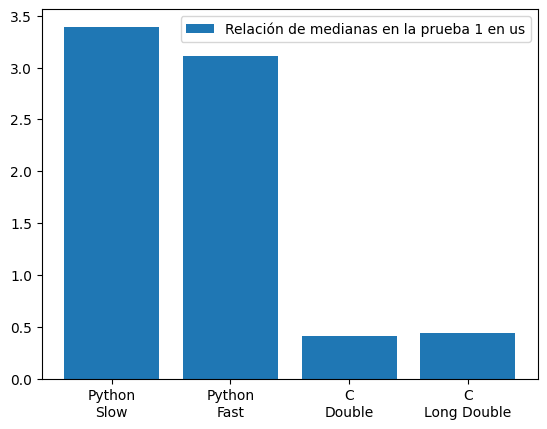

In [89]:
import matplotlib.pyplot as plt

plt.bar(['Python\nSlow','Python\nFast','C\nDouble','C\nLong Double'],[b1,b2,b3,b4],label="Relación de medianas en la prueba 1 en us")
plt.legend()
plt.show()

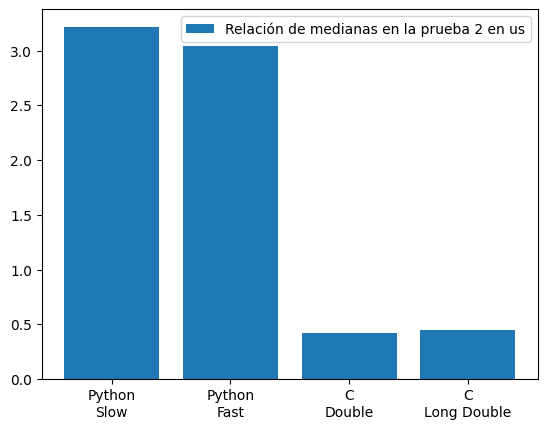

In [90]:
plt.bar(['Python\nSlow','Python\nFast','C\nDouble','C\nLong Double'],[c1,c2,c3,c4],label="Relación de medianas en la prueba 2 en us")
plt.legend()
plt.show()

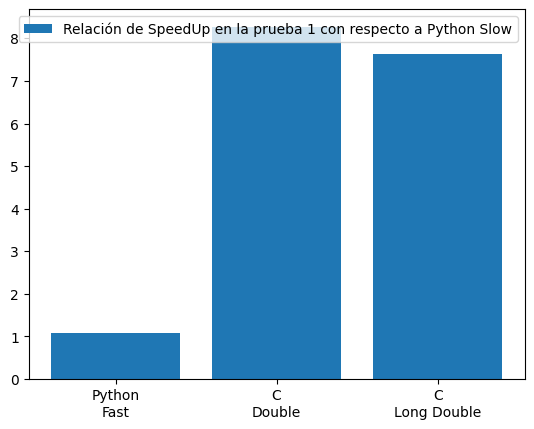

In [91]:
SUp1=[b1/b2,b1/b3,b1/b4]

plt.bar(['Python\nFast','C\nDouble','C\nLong Double'],SUp1,label="Relación de SpeedUp en la prueba 1 con respecto a Python Slow")
plt.legend()
plt.show()

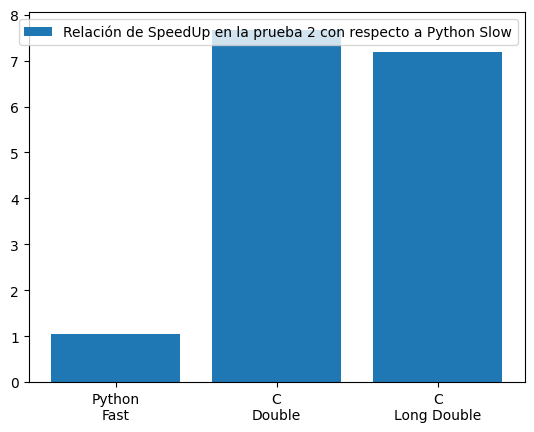

In [92]:
SUp2=[c1/c2,c1/c3,c1/c4]

plt.bar(['Python\nFast','C\nDouble','C\nLong Double'],SUp2,label="Relación de SpeedUp en la prueba 2 con respecto a Python Slow")
plt.legend()
plt.show()

In [93]:
def calc_cosens(f,inf,sup,n_angs,n_terms):
    angulos=np.linspace(inf,sup,n_angs)
    listaCosenos=[]
    for i in angulos:
        listaCosenos.append(f(i,n_terms))
    return np.array(listaCosenos)

In [94]:
def encontrar_mediana_de_mediciones_calc_cosens(f,inf,sup,n_terms,n_iter,n_angs):
    tiempo=[]
    for i in range(n_iter):
        tic=time.perf_counter()
        calc_cosens(f,inf,sup,n_angs,n_terms)
        toc=time.perf_counter()
        tiempo.append(1e6*(toc-tic))
    return np.median(tiempo)

In [95]:
f=py_slow_cos
n_terms=a1

d1=encontrar_mediana_de_mediciones_calc_cosens(f,inf,sup,n_terms,n_iter,n_angs)

In [96]:
d1

13716.599500185112

In [97]:
f=py_fast_cos
n_terms=a2

d2=encontrar_mediana_de_mediciones_calc_cosens(f,inf,sup,n_terms,n_iter,n_angs)

In [98]:
d2

3788.8140013819793

In [99]:
f=c_double_cos
n_terms=a3

d3=encontrar_mediana_de_mediciones_calc_cosens(f,inf,sup,n_terms,n_iter,n_angs)

In [100]:
d3

458.78700075263623

In [101]:
f=c_ldouble_cos
n_terms=a4

d4=encontrar_mediana_de_mediciones_calc_cosens(f,inf,sup,n_terms,n_iter,n_angs)

In [102]:
d4

475.898499644245

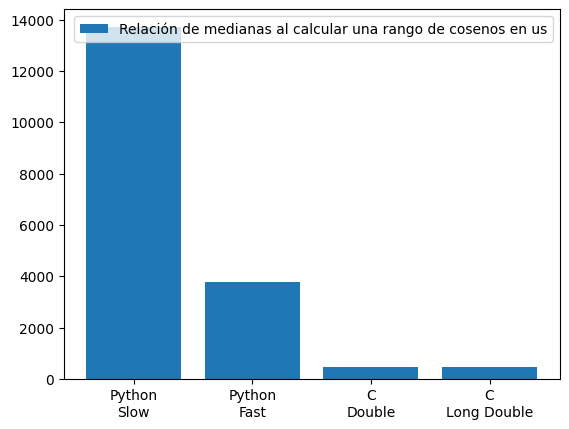

In [103]:
plt.bar(['Python\nSlow','Python\nFast','C\nDouble','C\nLong Double'],[d1,d2,d3,d4],label="Relación de medianas al calcular una rango de cosenos en us")
plt.legend()
plt.show()

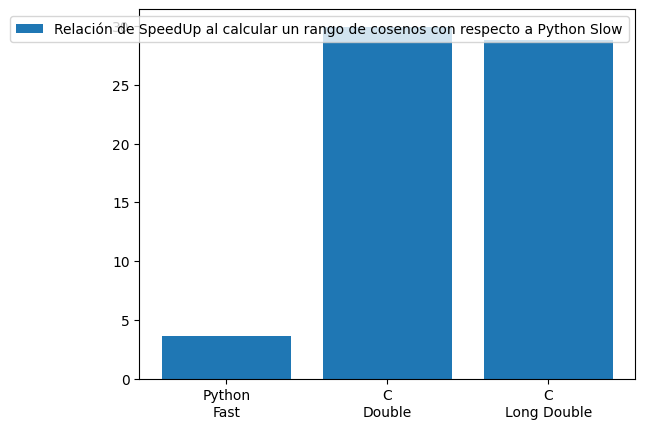

In [104]:
SUp3=[d1/d2,d1/d3,d1/d4]

plt.bar(['Python\nFast','C\nDouble','C\nLong Double'],SUp3,label="Relación de SpeedUp al calcular un rango de cosenos con respecto a Python Slow")
plt.legend()
plt.show()